# How do I make my pandas DataFrame smaller and faster?

In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [4]:
drinks.info()
# Every information about data set in a csv_file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
drinks.info(memory_usage = 'deep')
# Accurate memory calculation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [6]:
drinks.memory_usage()
# Memory usage in Bytes

Index                            128
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [7]:
drinks.memory_usage(deep = True)
# Actual size used in memory

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [8]:
drinks.memory_usage(deep = True).sum()
# Sum of all the memory used

31224

# Store data so that there is a minimum usage of memory

In [9]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [10]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [11]:
drinks['continent'] = drinks.continent.astype('category')

In [12]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [13]:
drinks.continent.head(
)
# storing it as 

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [14]:
drinks.continent.cat.codes.head()
# Representing 

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [16]:
drinks.memory_usage(deep = True)
# Continent memory reduced due category'

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [17]:
drinks['country'] = drinks.country.astype('category')

In [19]:
drinks.memory_usage(deep =True)
# for country memory increased because country categories are distinct

Index                             128
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [20]:
drinks.country.cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

In [21]:
df = pd.DataFrame({'ID':[100,101,102,103],'quality':['good','very good','good','excellent']})

In [22]:
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [23]:
df.sort_values('quality')
# Sorting in alphabetical order

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good



# How do I create dummy variables in pandas?

In [28]:
import pandas as pd

In [29]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [31]:
train.head()
# Passenger of titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
train['Sex_male'] = train.Sex.map({'female':0,'male':1})

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [35]:
# Another efficient way
pd.get_dummies(train.Sex)
# If there are k variables then there will be k-1 dummy variables

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [40]:
pd.get_dummies(train.Sex, prefix = 'Sex').iloc[:,1:]
# Add prefix before Sex

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [41]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
embarked_dummies = pd.get_dummies(train.Embarked, prefix = 'Embarked').iloc[:,1:]
# For K - 1 Values

In [50]:
train = pd.concat([train,embarked_dummies], axis= 1)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1.0,NaN,NaN,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0.0,NaN,NaN,0,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0.0,NaN,NaN,0,1
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,0.0,NaN,NaN,0,1
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,1.0,NaN,NaN,0,1


In [52]:
# Pass DataFrame to pd.get_dummies

In [55]:
pd.get_dummies(train , columns =['Sex','Embarked'], drop_first = True)
# New dummy columms made and older ones dropped

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Embarked_Q,Embarked_S,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,7.2500,NaN,1.0,NaN,NaN,0,1,1,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,71.2833,C85,0.0,NaN,NaN,0,0,0,0,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,0.0,NaN,NaN,0,1,0,0,1
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,53.1000,C123,0.0,NaN,NaN,0,1,0,0,1
4,5.0,0.0,3.0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,8.0500,NaN,1.0,NaN,NaN,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,0,0,0,0
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0


# How do I work with dates and times in pandas?

In [56]:
import pandas as pd

In [57]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [58]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [59]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [60]:
ufo.Time.str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [63]:
ufo['Time'] = pd.to_datetime(ufo.Time)
# Converting to datetime format

In [64]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [65]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [67]:
ufo.Time.dt.hour
# For pulling out the hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [72]:
ufo.Time.dt.weekday
# For gettinh weekday

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int64

In [74]:
ufo.Time.dt.dayofyear
# Pullout numeric day of the year

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int64

In [75]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [80]:
ts = pd.to_datetime('1/1/1999')

In [84]:
ufo.loc[ufo.Time >= ts,:].head()
# For all greater than ts

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [86]:
ufo.Time.max()
# For maximum time

Timestamp('2000-12-31 23:59:00')

In [88]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [89]:
%matplotlib inline

In [90]:
ufo['Year'] = ufo.Time.dt.year

In [91]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [92]:
ufo.Year.value_counts()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
        ... 
1941       2
1936       2
1935       1
1934       1
1933       1
Name: Year, Length: 68, dtype: int64

In [94]:
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, Length: 68, dtype: int64

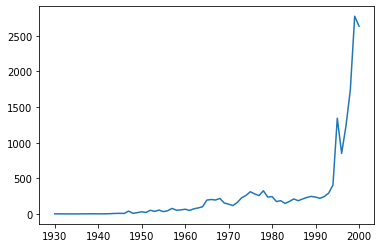

In [100]:
ufo.Year.value_counts().sort_index().plot()

# How do I find and remove duplicate rows in pandas?

In [1]:
import pandas as pd

In [2]:
# read a dataset of movie reviewers (modifying the default parameter values for read_table)
user_cols = ['user_id','age','gender','occupation','zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep = '|', header = None, names = user_cols)

In [3]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
users.shape

(943, 5)

In [17]:
users.zip_code.duplicated()
# Total number of duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
938    False
939     True
940    False
941    False
942    False
Name: zip_code, Length: 943, dtype: bool

In [23]:
users.zip_code.duplicated().sum()
# Total number of duplicates

148

In [33]:
users.loc[users.zip_code.duplicated(keep = 'last'),:]
# All duplicate values in the file

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
6,7,57,M,administrator,91344
13,14,45,M,scientist,55106
14,15,49,F,educator,97301
...,...,...,...,...,...
799,800,25,M,programmer,55337
803,804,39,M,educator,61820
809,810,55,F,other,80526
853,854,29,F,student,55408


In [36]:
users.loc[users.duplicated(),:]
# All duplicate values in the file

,user_id,age,gender,occupation,zip_code


# How do I avoid a SettingWithCopyWarning in pandas?

In [37]:
import pandas as pd

In [38]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [39]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [41]:
movies.content_rating.isnull().sum()
# Number of missing values

3

In [42]:
movies[movies.content_rating.isnull()]
# Missing values

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [43]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [44]:
movies[movies.content_rating == 'NOT RATED']

,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
41,8.5,Sunset Blvd.,NOT RATED,Drama,110,"[u'William Holden', u'Gloria Swanson', u'Erich..."
63,8.4,M,NOT RATED,Crime,99,"[u'Peter Lorre', u'Ellen Widmann', u'Inge Land..."
66,8.4,Munna Bhai M.B.B.S.,NOT RATED,Comedy,156,"[u'Sunil Dutt', u'Sanjay Dutt', u'Arshad Warsi']"
...,...,...,...,...,...,...
665,7.7,Lolita,NOT RATED,Drama,152,"[u'James Mason', u'Shelley Winters', u'Sue Lyon']"
673,7.7,Blow-Up,NOT RATED,Drama,111,"[u'David Hemmings', u'Vanessa Redgrave', u'Sar..."
763,7.6,Hunger,NOT RATED,Biography,96,"[u'Stuart Graham', u'Laine Megaw', u'Brian Mil..."
827,7.5,The Wind That Shakes the Barley,NOT RATED,Drama,127,"[u'Cillian Murphy', u'Padraic Delaney', u'Liam..."


In [48]:
import numpy as np
movies[movies.content_rating == 'NOT RATED'].content_rating= np.nan

C:\Users\Hardeep\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
movies.loc[movies.content_rating == 'NOT RATED', 'content_rating'] = np.nan
# Improved code to avoid warning

In [51]:
top_movies = movies.loc[movies.star_rating >= 9, :]

In [53]:
top_movies.loc[0,'duration'] = 150
# change the value in the data

In [54]:
top_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [55]:
top_movies = movies.loc[movies.star_rating >= 9, :].copy()

In [56]:
top_movies.loc[0,'duration'] = 150

In [57]:
top_movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


# How do I change display options in pandas?

In [58]:
import pandas as pd


In [59]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [60]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [62]:
pd.get_option('display.max_rows')
# It can display only 60 rows on the screen 

60

In [67]:
pd.set_option('display.max_rows', None)
# To see all the rows

In [66]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


In [71]:
pd.reset_option('display.max_rows')
# To reset back to original 60 row display


In [70]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [72]:
pd.get_option('display.max_columns')
# Max options currently showing

20

In [73]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
pd.get_option('display.max_colwidth')
#Max column width allowed is 50 characters

50

In [81]:
pd.set_option('display.max_colwidth', 1000)
#Max column width allowed is 1000 characters

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
pd.get_option('display.precision')
# It is having six digits after decimal point in the data

6

In [84]:
pd.set_option('display.precision',2)
# Set the number of decimal points to 2

In [85]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C


In [93]:
drinks['x'] = drinks.wine_servings*1000
# Multiply the complete column with 1000

In [94]:
drinks['y'] = drinks.total_litres_of_pure_alcohol*1000
# Multiply the complete column with 1000

In [95]:
pd.set_option('display.float_format','{:,}'.format)
# To add commas after 1000 in the list as shown in y

In [96]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,1000,0.0,Asia,1000000,0.0
1,Albania,89,132,1000,4.9,Europe,1000000,"4,900.0"
2,Algeria,25,0,1000,0.7,Africa,1000000,700.0
3,Andorra,245,138,1000,12.4,Europe,1000000,"12,400.0"
4,Angola,217,57,1000,5.9,Africa,1000000,"5,900.0"


In [97]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
x                                 int64
y                               float64
dtype: object

# How do I create a pandas DataFrame from another object?

In [98]:
import pandas as pd

In [99]:
pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']})

,id,color
0,100,red
1,101,blue
2,102,red


In [101]:
pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']}, columns = ['id','color'])
# set column as per your choice

,id,color
0,100,red
1,101,blue
2,102,red


In [103]:
df = pd.DataFrame({'id':[100,101,102], 'color':['red','blue','red']}, columns = ['id','color'], index = ['a','b','c'])
# set row index as per your choice

In [105]:
pd.DataFrame([[100, 'red'],[101,'blue'],[102,'red']], columns =['id','color'])
# DataFrame as list of lists

,id,color
0,100,red
1,101,blue
2,102,red


In [106]:
import numpy as np

In [108]:
arr = np.random.rand(4,2)
arr

array([[0.20484789, 0.12321377],
       [0.83147797, 0.55992154],
       [0.57319786, 0.29832462],
       [0.35802482, 0.73007151]])

In [109]:
pd.DataFrame(arr, columns = ['one','two'])
# Create numpy array

,one,two
0,0.2048478889237495,0.12321377423120183
1,0.8314779654933893,0.5599215443763379
2,0.5731978587985621,0.2983246245390565
3,0.3580248150597445,0.7300715069809867


In [113]:
pd.DataFrame({'student':np.arange(100,110,1),'test':np.random.randint(60,101,10)}).set_index('student')

,test
student,
100,84
101,88
102,63
103,85
104,95
105,69
106,74
107,100
108,84


In [118]:
s = pd.Series(['round','square'], index = ['c','b'], name = 'shape')
s
# DataFrame using series

c     round
b    square
Name: shape, dtype: object

In [119]:
df

,id,color
a,100,red
b,101,blue
c,102,red


In [120]:
pd.concat([df, s], axis = 1)
# concatenate two series

,id,color,shape
a,100,red,NaN
b,101,blue,square
c,102,red,round


# How do I apply a function to a pandas Series or DataFrame?